<a href="https://colab.research.google.com/github/celinecresswell/learning_ML_datasci/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Excersise
Supervised classification problem

Target variable is discrete in nature

1. Predict response value using the equation z = b0 +b1x1 +... bnxn
2. Predicted response value, z, converted into a probability value between 0 and 1 - using the sigmoid function
    a. theta(z) = 1/(1+e^-z)
3. The probablity value is then mapped to a discrete clas using a selected threshold value, the decision boundary.


Assumptions of logistic regression
1. Dependent variable must be binary, multinomial or ordinal.
2. Observations must be independent of each other, ie not from repeat measurements
3. Independent variables must not be highly correlated.
4. Linearity of independent variables and log odds are assumed.


3 Types - Based on the target variable categories
1. Binary logistic regression
2. Multinomial logistic regression
3. Ordinal logistic regression



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Import dataset
df = pd.read_csv('/content/full_data.csv')

In [3]:
#Exploratory data analysis
df.shape

(4981, 11)

In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
#List the categorical variables

categorical = [var for var in df.columns if df[var].dtype =='object']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [8]:
df[categorical]

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Male,Yes,Private,Rural,never smoked
2,Female,Yes,Private,Urban,smokes
3,Female,Yes,Self-employed,Rural,never smoked
4,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...
4976,Male,No,Private,Rural,formerly smoked
4977,Male,Yes,Private,Urban,smokes
4978,Female,Yes,Govt_job,Rural,smokes
4979,Male,Yes,Private,Rural,smokes


In [9]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [10]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [11]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

Categorical variable summary

1. There are 5 
2. None of these are the target variable (stroke)
3. Binary categorical = ever married, Residence type


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['gender'] = le.fit_transform(df['gender'])

In [14]:
df['gender'].unique

<bound method Series.unique of 0       1
1       1
2       0
3       0
4       1
       ..
4976    1
4977    1
4978    0
4979    1
4980    0
Name: gender, Length: 4981, dtype: int64>

In [15]:
df['ever_married'] = le.fit_transform(df['ever_married'])
df['ever_married'].head()

0    1
1    1
2    1
3    1
4    1
Name: ever_married, dtype: int64

In [16]:
df['work_type'] = le.fit_transform(df['work_type'])
df['work_type'].head()

0    1
1    1
2    1
3    2
4    1
Name: work_type, dtype: int64

In [17]:
df['work_type'].unique()

array([1, 2, 0, 3])

In [18]:
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['Residence_type'].head()

0    1
1    0
2    1
3    0
4    1
Name: Residence_type, dtype: int64

In [19]:
df['Residence_type'].unique()

array([1, 0])

In [20]:
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['smoking_status'].head()

0    1
1    2
2    3
3    2
4    1
Name: smoking_status, dtype: int64

In [21]:
df['smoking_status'].unique()

array([1, 2, 3, 0])

Gender: Male = 1
        Female = 0

ever_married: Yes = 1
              No = 0

work_type: Private = 1
            Self_employed = 0 
            Government job = 0
            Children = 3

Residence_type: Urban = 1
                Rural = 0

smoking_status: formly_smoked = 1
                never_smoked = 2 
                smokes = 3
                unknown =0

In [22]:
#Check for missing data
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Text(0, 0.5, 'No.')

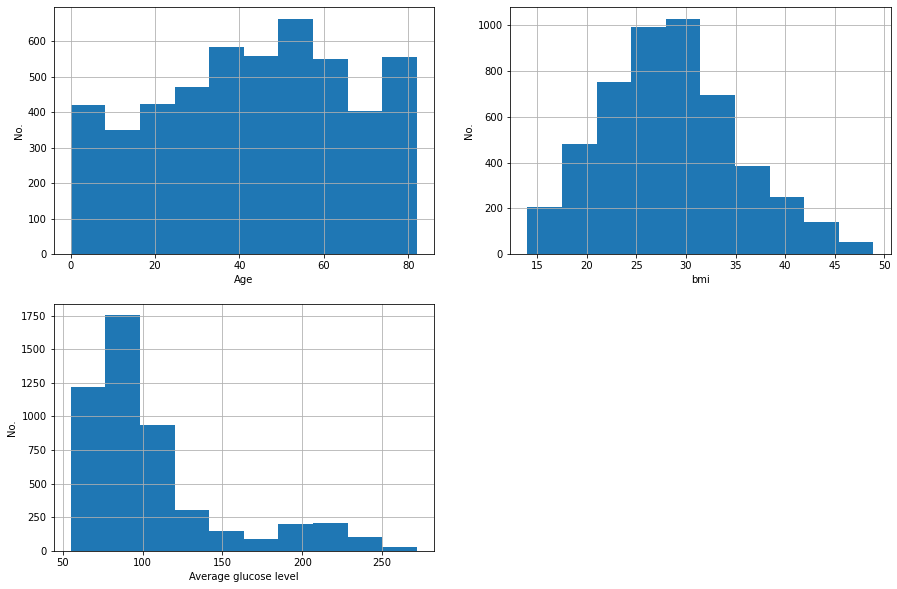

In [23]:
#Check the distribution of the numerical values

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.age.hist(bins=10)
fig.set_xlabel('Age')
fig.set_ylabel('No.')

plt.subplot(2,2,2)
fig = df.bmi.hist(bins=10)
fig.set_xlabel('bmi')
fig.set_ylabel('No.')

plt.subplot(2,2,3)
fig = df.avg_glucose_level.hist(bins=10)
fig.set_xlabel('Average glucose level')
fig.set_ylabel('No.')

Text(0, 0.5, 'avg_gluc_lvl')

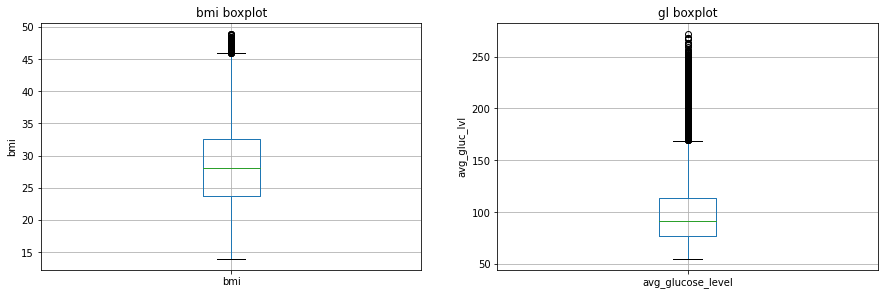

In [24]:
#bmi and average glucose level data looks slightly skewed - check with box plots for outliers
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column = 'bmi')
fig.set_title('bmi boxplot')
fig.set_ylabel('bmi')

plt.subplot(2,2,2)
fig = df.boxplot(column ='avg_glucose_level')
fig.set_title('gl boxplot')
fig.set_ylabel('avg_gluc_lvl')


In [25]:
# find outliers for bmi variable

IQR = df.bmi.quantile(0.75) - df.bmi.quantile(0.25)
Lower_fence = df.bmi.quantile(0.25) - (IQR * 3)
Upper_fence = df.bmi.quantile(0.75) + (IQR * 3)
print('bmi outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

bmi outliers are values < -3.000000000000007 or > 59.30000000000001


In [26]:
# find outliers for average glucose variable

IQR = df.avg_glucose_level.quantile(0.75) - df.avg_glucose_level.quantile(0.25)
Lower_fence = df.avg_glucose_level.quantile(0.25) - (IQR * 3)
Upper_fence = df.avg_glucose_level.quantile(0.75) + (IQR * 3)
print('avg_glucose_level outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

avg_glucose_level outliers are values < -32.65999999999998 or > 223.75


There are many outliers in the average glucose level data. We will need to filter out those outliers.

In [27]:
#Declare target and feature variables
X = df.drop(['stroke'], axis =1)
y = df['stroke']

In [28]:
#split into test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =1)


In [29]:
#Check the shape

X_train.shape, X_test.shape

((3984, 10), (997, 10))

In [30]:
#top oding approach to cap max values and remove outliers from avg_glucose_level
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['avg_glucose_level'] = max_value(df3, 'avg_glucose_level', 223.75)

In [31]:
X_train.avg_glucose_level.max(), X_test.avg_glucose_level.max()

(223.75, 223.75)

In [32]:
cols = X_train.columns

In [33]:
#feature scaling
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)

In [34]:
#X_train = pd.DataFrame(X_train, columns = [cols])

In [35]:
#X_train.describe()

In [36]:
#import model libraries
from sklearn.linear_model import LogisticRegression

lR = LogisticRegression(solver = 'liblinear', random_state = 0)


#Fit the logistic regression model to the engineered data
model = lR.fit(X_train, y_train)

In [37]:
y_pred =lR.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

print('Model accuracy score was: {0:0.4f}' . format(accuracy_score(y_test, y_pred)))

Model accuracy score was: 0.9378


In [40]:
#Check for over fitting
print('Training set score: {:.4f}'.format(lR.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lR.score(X_test, y_test)))

Training set score: 0.9533
Test set score: 0.9378


Comparable accuracies so no overfitting, potentially could be underfitting. Try a more complex model

In [41]:
lR100 = LogisticRegression(C = 100, solver = 'liblinear', random_state =0)

model100 = lR100.fit(X_train, y_train)

In [42]:
y_pred100 = model100.predict(X_test)

In [43]:
print('Model accuracy score was: {0:0.4f}'. format(accuracy_score(y_test, y_pred100)))

Model accuracy score was: 0.9378


In [44]:
y_test.value_counts()

0    935
1     62
Name: stroke, dtype: int64

In [46]:
null_accuracy = 935/(935+62)

print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.9378


In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[935   0]
 [ 62   0]]


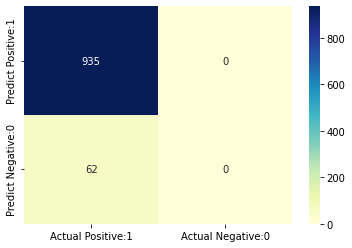

In [49]:
#Visualise with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       935
           1       0.00      0.00      0.00        62

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.88      0.94      0.91       997



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [53]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0622
